### Лабораторная работа №3 по машинному обучению  
**15-В-1. Егоров Андрей. 4 вариант.**

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold,
                                     train_test_split)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from scipy.stats import *

house = pd.read_csv('kc_house_data.csv')

**1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.**

Этот набор данных состоит из отпускных цен на дома для королевской страны, включающие Сиэтл. 
Включает в себя дома, проданные в период между маем 2014 и маем 2015  
id - индивидуальный номер для каждого дома  
date - дата продажи  
price - цена каждого проданного дома  
bedrooms - количество спальных комнат  
bathrooms - количество ванных комнат( где 5 записей для комнаты с туалетом, но без душа)  
sqft_living - площадь в квадратных футах жилой площади  
sqft_lot - площадь к квадратных футах пространства земли  
floors - количество этажей  
waterfront - фиктивная линия для того, выходила ли квартира на береговую линию или нет  
view - индекс оценки собственности от 0 до 4  
condition - индекс оценки условий в апартаментах от 0 до 5
grade - индекс уровня строительства( 1-3 далек от строительства, 7 - средний уровень, 11-13 высококачественный уровень строительства)  
sqft_above - площадь в квадратных футах внутренней жилплозади, над уровнем земли  
sqft_basement - площадь в квадратных футах внутренней жилплощади ниже уровня земли  
yr_built - год первоначальной постройки здания  
yr_renivated - год последней реставрации здания  
zipcode - индекс дома  
lat - широта  
long - долгота  
sqft_living15 - площадь в квадратных футах внутренней жилплощади до самых близких 15 соседей  
sqft_lot15 - площадь в квадратных футах участков земли самых близких 15 соседей  

**2. Удалите дубликаты строк в наборе данных;приведите размер набора данных до и после данной операции.**

In [2]:
house.shape

(21613, 21)

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
house = house.drop_duplicates()
house = house.dropna()
house.shape

(21613, 21)

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.6+ MB


In [8]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)**

In [9]:
numerical_columns = [i for i in house.columns if house[i].dtype.name != 'object']
categorial_columns = [i for i in house.columns if house[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
categorial:  ['date']


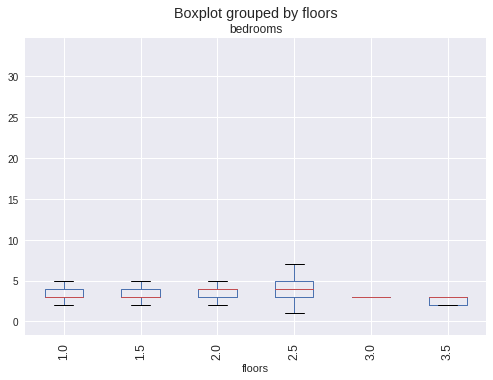

In [10]:
house.boxplot(column='bedrooms',by='floors',rot=90)
plt.show()

In [11]:
def cast(obj):
    if type(obj) == str:
        return float(obj.replace(',', '.'))
    else:
        return obj

house['bathrooms'] = house['bathrooms'].apply(lambda x: cast(x))
house['floors'] = house['floors'].apply(lambda x: cast(x))

In [12]:
numerical_columns = [i for i in house.columns if house[i].dtype.name != 'object']
categorial_columns = [i for i in house.columns if house[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
categorial:  ['date']


In [13]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.6+ MB


In [14]:
# нормализация
scaler = MinMaxScaler()
house[numerical_columns] = scaler.fit_transform(house[numerical_columns])

house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,20141013T000000,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,...,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,20141209T000000,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,...,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,20150225T000000,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,...,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,20141209T000000,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,...,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,20150218T000000,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,...,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


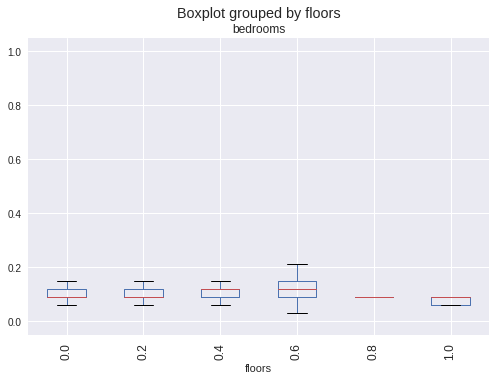

In [15]:
house.boxplot(column='bedrooms',by='floors',rot=90)
plt.show()

**4.   Выполните замену категориальных признаков. Выберите и обоснуйте способ замены.**

Категориальных признаков нет

**5.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других.**

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.054012  0.154178   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.126434  0.0

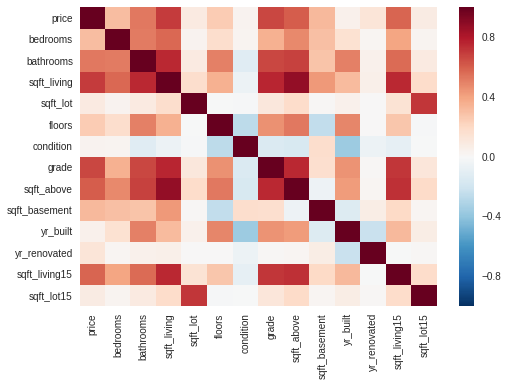

In [16]:
corr_matrix = house.drop(['id', 'date','waterfront','view','zipcode','lat','long'], axis=1).corr()
sns.heatmap(corr_matrix);
print(corr_matrix)
plt.show()

**6.Заполните пропущенные значения в данных.**

In [17]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null float64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null float64
bathrooms        21613 non-null float64
sqft_living      21613 non-null float64
sqft_lot         21613 non-null float64
floors           21613 non-null float64
waterfront       21613 non-null float64
view             21613 non-null float64
condition        21613 non-null float64
grade            21613 non-null float64
sqft_above       21613 non-null float64
sqft_basement    21613 non-null float64
yr_built         21613 non-null float64
yr_renovated     21613 non-null float64
zipcode          21613 non-null float64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null float64
sqft_lot15       21613 non-null float64
dtypes: float64(20), object(1)
memory usage: 3.6+ MB

Пропусков нет.

**7.Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value.**

In [18]:
# Линейная регрессия, RIDGE регуляризатор.
X, y = house.drop(['price','date'], axis=1), house['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
reg = linear_model.Ridge (alpha = .1)
reg.fit (X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
reg.coef_

array([-0.00150379, -0.15423292,  0.04630033,  0.11425454,  0.01861383,
        0.00164576,  0.07448138,  0.0279181 ,  0.01340094,  0.14866561,
        0.13806133,  0.05285338, -0.03972771,  0.00507821, -0.01464633,
        0.04922412, -0.03191218,  0.01626991, -0.04226561])

In [20]:
xt = reg.predict(X_test)
print(xt[:10])

[ 0.05080936  0.08871948  0.15240363  0.20817382  0.08608611  0.02733088
  0.09908385  0.05586763  0.04116322  0.05315212]


In [21]:
print(y_test[:10])

735      0.038033
2830     0.103607
4106     0.126295
16218    0.185574
19964    0.083410
1227     0.017836
18849    0.093770
19369    0.079344
20164    0.040590
7139     0.069508
Name: price, dtype: float64


In [22]:
print(xt[:10]-y_test[:10])

735      0.012777
2830    -0.014887
4106     0.026109
16218    0.022600
19964    0.002676
1227     0.009495
18849    0.005313
19369   -0.023477
20164    0.000573
7139    -0.016356
Name: price, dtype: float64


In [23]:
reg.intercept_

-0.067187462506084636

In [24]:
# линейная регрессия без использования регуляризаторов;
X, y = house.drop(['price','date' ], axis=1), house['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
reg.coef_

array([-0.00150475, -0.15612338,  0.04636183,  0.11454502,  0.0192528 ,
        0.00161444,  0.0745152 ,  0.02788248,  0.0134087 ,  0.148684  ,
        0.13840891,  0.05299423, -0.03975151,  0.00506596, -0.01466068,
        0.04921607, -0.03192494,  0.01612713, -0.04303556])

In [26]:
reg.intercept_

-0.067048496783891812

In [27]:
corr={}
corr['pearson'], _ = stats.pearsonr(xt,y_test)
corr['spearman'], _ = stats.spearmanr(xt,y_test)
print(corr['pearson'])
print(corr['spearman'])

0.83135814167
0.858067095146


In [35]:
stats.ttest_1samp(house['price'], 0)  

Ttest_1sampResult(statistic=186.24140333858497, pvalue=0.0)